## Observations and Insights 

The following observations and insights were made while analyzing the study data.

1. Pymaceutical's Capomulin was effective at reducing tumor volume over the course of the study in mice making it a good candidate for further trials.

1. Capomulin had similar results to Ramicane in terms of effectiveness at reducing tumor size. It would be worth comparing more in terms of side effects, cost if it may have advantages or disadvantages as an effective treatment.

1. Many of the other drugs tested were no better than the placebo in reducing tumor size.


In [491]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(study_results.head())
# print(mouse_metadata.head())

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [369]:
# Checking the number of mice.
unique = merge_df['Mouse ID'].unique()
print(len(unique))

249


In [370]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_df = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dups = dups_df['Mouse ID'].unique()
dups


array(['g989'], dtype=object)

In [371]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [372]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [373]:
# Checking the number of mice in the clean DataFrame.
unique = clean_df['Mouse ID'].unique()
print(len(unique))

248


## Summary Statistics

In [374]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_df = clean_df.groupby('Drug Regimen')

mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
standard_deviation = group_df['Tumor Volume (mm3)'].std()
SEM  = group_df['Tumor Volume (mm3)'].sem()

summary_tumor_vol_df = pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev.':standard_deviation,
    'Tumor Volume Std. Err.':SEM
})
summary_tumor_vol_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [375]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_df['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

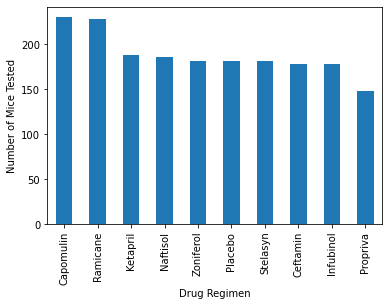

In [376]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_df = group_df.count().reset_index()
regimen_mouse_id_df = count_df[['Drug Regimen', 'Mouse ID']]
sorted_df = regimen_mouse_id_df.sort_values('Mouse ID', ascending = False)
plot_df = sorted_df.plot(kind="bar", legend= False)
plot_df.set_xticklabels(sorted_df["Drug Regimen"])
plot_df.set_xlabel("Drug Regimen")
plot_df.set_ylabel("Number of Mice Tested")
plot_df

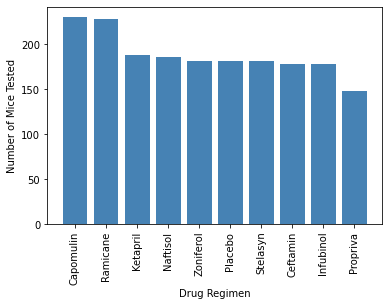

In [377]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import matplotlib.pyplot as plt
import numpy as np

count_df = group_df['Mouse ID'].count().reset_index() #Note the column doesn't matter here
drugs_tested = sorted_df['Drug Regimen']
num_measurements = sorted_df['Mouse ID']

x_axis = np.arange(len(drugs_tested))
plt.bar(x_axis, num_measurements, color='steelblue', align="center")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(x_axis, drugs_tested, rotation=90)
plt.show()


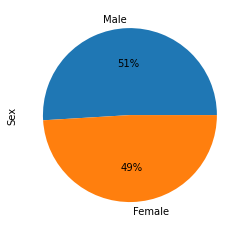

In [378]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_df = clean_df.groupby('Sex').count()
# group_df
sorted_df = group_df.sort_values('Mouse ID', ascending = False)
sex_df = sorted_df[['Mouse ID']]
sex_df = sex_df.rename(columns={"Mouse ID":"Sex"})
sex_df
plot_df = sex_df.plot(kind="pie", 
                      y='Sex', 
                      legend= False, 
                      subplots=True,
                      autopct='%1.0f%%')

Text(0, 0.5, 'Sex')

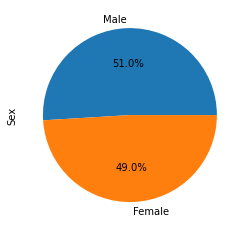

In [379]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import numpy as np

sex_df
labels = sex_df.index
values = sex_df['Sex']
labels
values
plt.pie(values,
        labels=labels,
        autopct="%1.1f%%",
        
       )
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [414]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# pd.set_option('display.max_rows', 2000)
# clean_df

# Start by getting the last (greatest) timepoint for each mouse
last_df = clean_df.groupby('Mouse ID').max('Timepoint')
last_df = last_df.reset_index()
last_df = last_df[['Mouse ID', 'Timepoint']]
last_df
# check a single value shows as expected
# clean_df.loc[(clean_df['Timepoint'] == 45) & (clean_df['Mouse ID'] == 'a203')]
# print(clean_df.loc[(clean_df['Timepoint'] == 45) & (clean_df['Mouse ID'] == 'z578')])
# clean_df.loc[clean_df['Mouse ID'] == 'a457']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = last_df.merge(clean_df, on=["Mouse ID", "Timepoint"], how='left')
last_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [466]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [ 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = last_df.loc[last_df['Drug Regimen'] == treatment]
#     print(treatment_df.head())

    # add subset 
    vols = treatment_df['Tumor Volume (mm3)']
    tumor_volumes.append(vols)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) |
                                (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


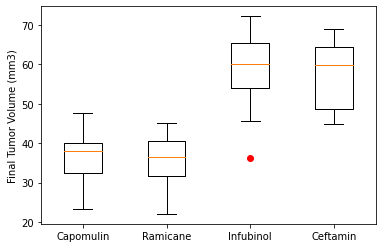

In [468]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# print(tumor_volumes)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

#How do we get the outline around the symbol?
ax1.boxplot(tumor_volumes, sym='ro') 
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

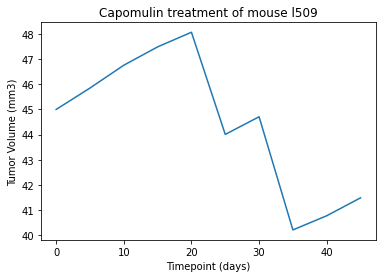

In [469]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df.loc[clean_df['Mouse ID'] == 'l509']
# mouse_df = mouse_df[['Timepoint', 'Tumor Volume (mm3)']]
mouse_df.plot('Timepoint',
              'Tumor Volume (mm3)',
              kind='line',
              legend= False,
             xlabel='Timepoint (days)',
             ylabel='Tumor Volume (mm3)',
             title='Capomulin treatment of mouse l509')

<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

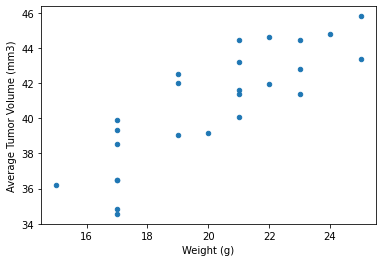

In [470]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
clean_df.head()
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df = capomulin_df.groupby('Mouse ID').mean()
capomulin_df = capomulin_df.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
# capomulin_df
capomulin_df.plot('Weight (g)',
                  'Average Tumor Volume (mm3)',
                  kind='scatter',
                  legend= False,
                  xlabel='Weight',
                  ylabel='Average Tumor Volume (mm3)')

## Correlation and Regression

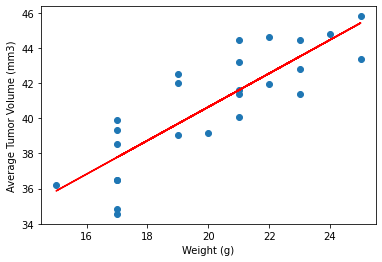

In [490]:
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Average Tumor Volume (mm3)']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(15,41),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
